<a href="https://colab.research.google.com/github/shivakumar17/hotel-booking/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/hotel booking/Copy of Hotel Bookings.csv')

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Checking info about each column in datasetfinding the datatype and  null values for each columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

There are null values in company, agent and country 

In [7]:
df['company'].isnull().sum()

112593

In [8]:
company=df[df['company'].notnull()]['company']

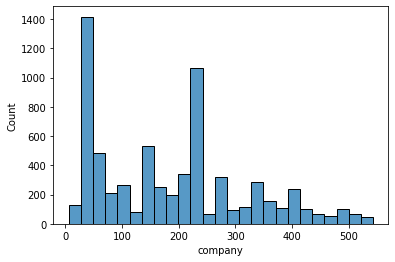

In [9]:
sns.histplot(company)

In [10]:
df['company'].isnull().sum()/len(df)

0.943068933746545

It is seen tha Null values are more than 94 percent in company. So we can neglect the null company column in dataset


In [11]:
df.drop(columns='company',inplace=True)

In [12]:
df['agent'].isnull().sum()/len(df)

0.13686238378423654

Very less percentage of null values in column agent. so we cannot neglect it

In [13]:
agent=df[df['agent'].notnull()]['agent']

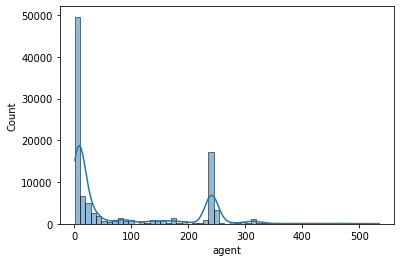

In [14]:
sns.histplot(agent,kde=True)

The data is not normally distributed, so we could use median to replace all null values

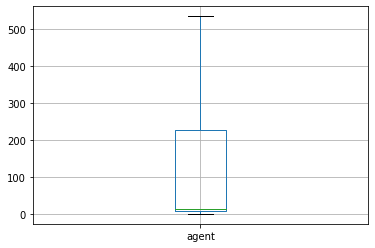

In [15]:
df.boxplot(column='agent')

In [16]:
print(agent.median())
print(agent.mean())

14.0
86.69338185346919


In [17]:
df['agent'].fillna(agent.median(),inplace=True)

In [18]:
df['country'].isnull().sum()

488

In [19]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

As the column country has only 488 we cannot neglect this column but we cannot implement mean or median on this as these are object datatype. we can remove those rows containing null as the rows are very less in number and cannot effect our analysis

In [20]:
df.dropna(axis=0,how='any',inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [22]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [23]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

There are only two hotels in this dataset that we are going to analyse

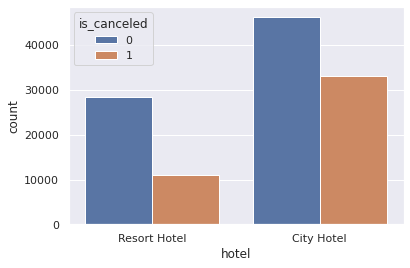

In [24]:
sns.set_theme(style="darkgrid")
sns.countplot(x=df['hotel'], hue=df['is_canceled'], data=df)

Here we can see that total number of canceled bookings in each hotel

In [25]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [26]:
df['arrival_date_month'].replace({'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6},inplace=True)

In [27]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


finding total nights stayed in hotel

In [28]:
df['total_nights']=df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [29]:
weekend_nights_2015=df[df['arrival_date_year']==2015].groupby(['arrival_date_month'])['stays_in_weekend_nights'].sum()
week_nights_2015=df[df['arrival_date_year']==2015].groupby(['arrival_date_month'])['stays_in_week_nights'].sum()
total_2015=df[df['arrival_date_year']==2015].groupby(['arrival_date_month'])['total_nights'].sum()

In [30]:
weekend_nights_2016=df[df['arrival_date_year']==2016].groupby(['arrival_date_month'])['stays_in_weekend_nights'].sum()
week_nights_2016=df[df['arrival_date_year']==2016].groupby(['arrival_date_month'])['stays_in_week_nights'].sum()
total_2016=df[df['arrival_date_year']==2016].groupby(['arrival_date_month'])['total_nights'].sum()

In [31]:
weekend_nights_2017=df[df['arrival_date_year']==2017].groupby(['arrival_date_month'])['stays_in_weekend_nights'].sum()
week_nights_2017=df[df['arrival_date_year']==2017].groupby(['arrival_date_month'])['stays_in_week_nights'].sum()
total_2017=df[df['arrival_date_year']==2017].groupby(['arrival_date_month'])['total_nights'].sum()

Text(0.5, 1.0, 'Total nights booked in every month in 2015')

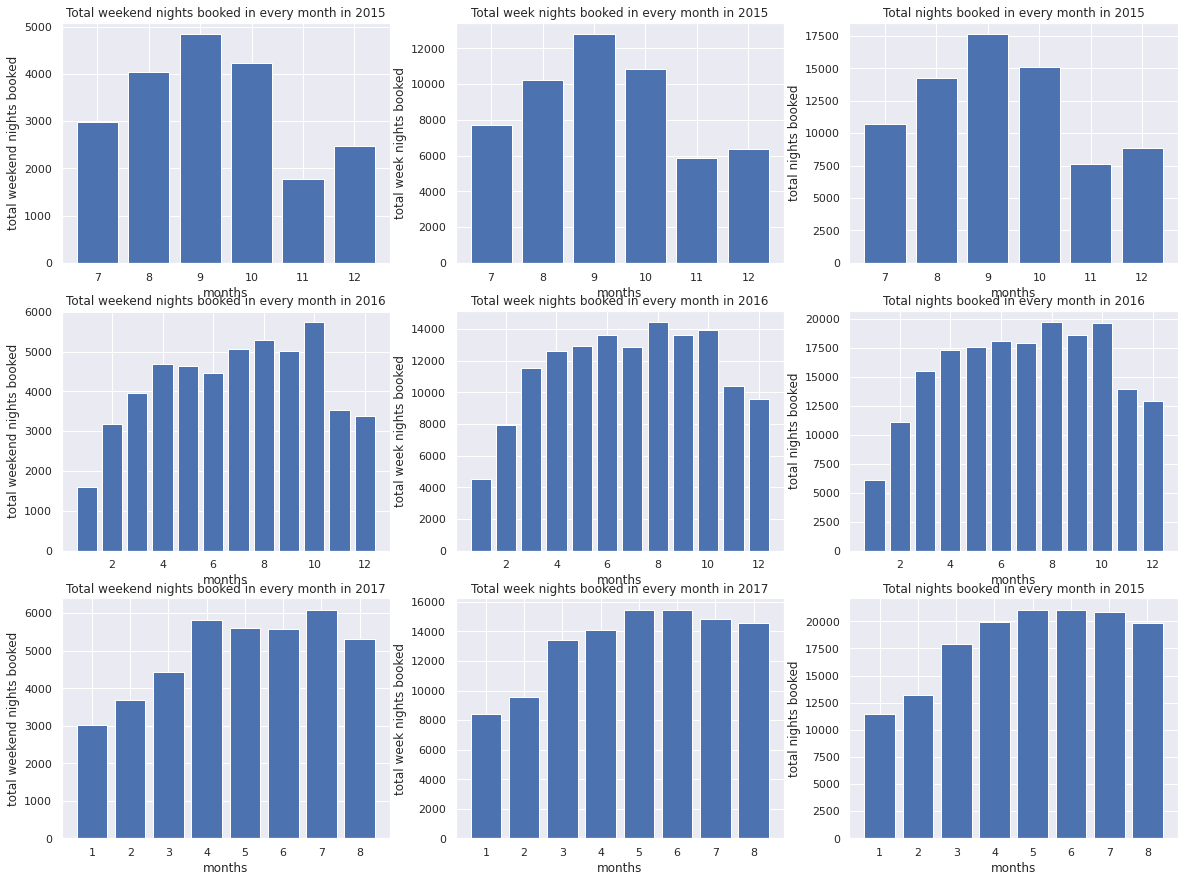

In [32]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.bar(weekend_nights_2015.index,height=weekend_nights_2015)
plt.xlabel('months')
plt.ylabel('total weekend nights booked')
plt.title('Total weekend nights booked in every month in 2015')

plt.subplot(3,3,2)
plt.bar(week_nights_2015.index,height=week_nights_2015)
plt.xlabel('months')
plt.ylabel('total week nights booked')
plt.title('Total week nights booked in every month in 2015')

plt.subplot(3,3,3)
plt.bar(total_2015.index,height=total_2015)
plt.xlabel('months')
plt.ylabel('total nights booked')
plt.title('Total nights booked in every month in 2015')


plt.subplot(3,3,4)
plt.bar(weekend_nights_2016.index,height=weekend_nights_2016)
plt.xlabel('months')
plt.ylabel('total weekend nights booked')
plt.title('Total weekend nights booked in every month in 2016')


plt.subplot(3,3,5)
plt.bar(week_nights_2016.index,height=week_nights_2016)
plt.xlabel('months')
plt.ylabel('total week nights booked')
plt.title('Total week nights booked in every month in 2016')


plt.subplot(3,3,6)
plt.bar(total_2016.index,height=total_2016)
plt.xlabel('months')
plt.ylabel('total nights booked')
plt.title('Total nights booked in every month in 2016')


plt.subplot(3,3,7)
plt.bar(weekend_nights_2017.index,height=weekend_nights_2017)
plt.xlabel('months')
plt.ylabel('total weekend nights booked')
plt.title('Total weekend nights booked in every month in 2017')

plt.subplot(3,3,8)
plt.bar(week_nights_2017.index,height=week_nights_2017)
plt.xlabel('months')
plt.ylabel('total week nights booked')
plt.title('Total week nights booked in every month in 2017')

plt.subplot(3,3,9)
plt.bar(total_2017.index,height=total_2017)
plt.xlabel('months')
plt.ylabel('total nights booked')
plt.title('Total nights booked in every month in 2015')



We can see the trend of hotel booking in each month in every year.Every year totl night booking were increase gradually.
In 2015, September month recieved highest number of night bookings.similarly in 2016 October month recieved highest bookings. In 2017 mid year from April recieved highest bookings

In [33]:
per_spec_resort=df[df['hotel']=='Resort Hotel']['total_of_special_requests'].sum()/len(df[df['hotel']=='Resort Hotel'])*100
per_spec_resort

62.104758056369334

In [34]:
per_spec_city=df[df['hotel']=='City Hotel']['total_of_special_requests'].sum()/len(df[df['hotel']=='City Hotel'])*100
per_spec_city

54.7035383722983

Text(0.5, 1.0, 'Percentage of special requests for each hotel')

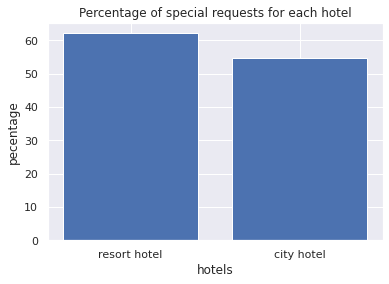

In [35]:
plt.bar(x=['resort hotel','city hotel'],height=[per_spec_resort,per_spec_city])
plt.xlabel('hotels')
plt.ylabel('pecentage')
plt.title('Percentage of special requests for each hotel')


The Resort hotel likely to receive a disproportionately high number of special requests as its percentage of special requests is above 60 

In [36]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [37]:
country_resort=df[df['hotel']=='Resort Hotel']['country'].value_counts().head(10)

Text(0.5, 1.0, 'total number of booking by each county for Resort Hotel')

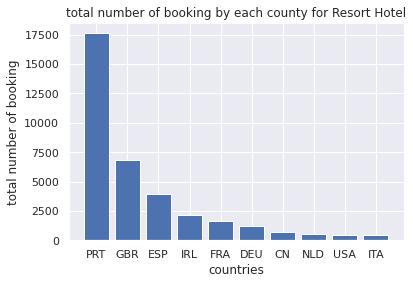

In [38]:
plt.bar(country_resort.index,height=country_resort)
plt.xlabel('countries')
plt.ylabel('total number of booking')
plt.title('total number of booking by each county for Resort Hotel')

In [39]:
country_city=df[df['hotel']=='City Hotel']['country'].value_counts().head(10)

Text(0.5, 1.0, 'total number of booking by each county for City Hotel')

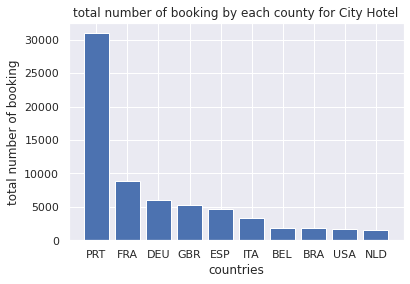

In [40]:
plt.bar(country_city.index,height=country_city)
plt.xlabel('countries')
plt.ylabel('total number of booking')
plt.title('total number of booking by each county for City Hotel')

Text(0.5, 1.0, 'waiting list for each hotel every month of an year')

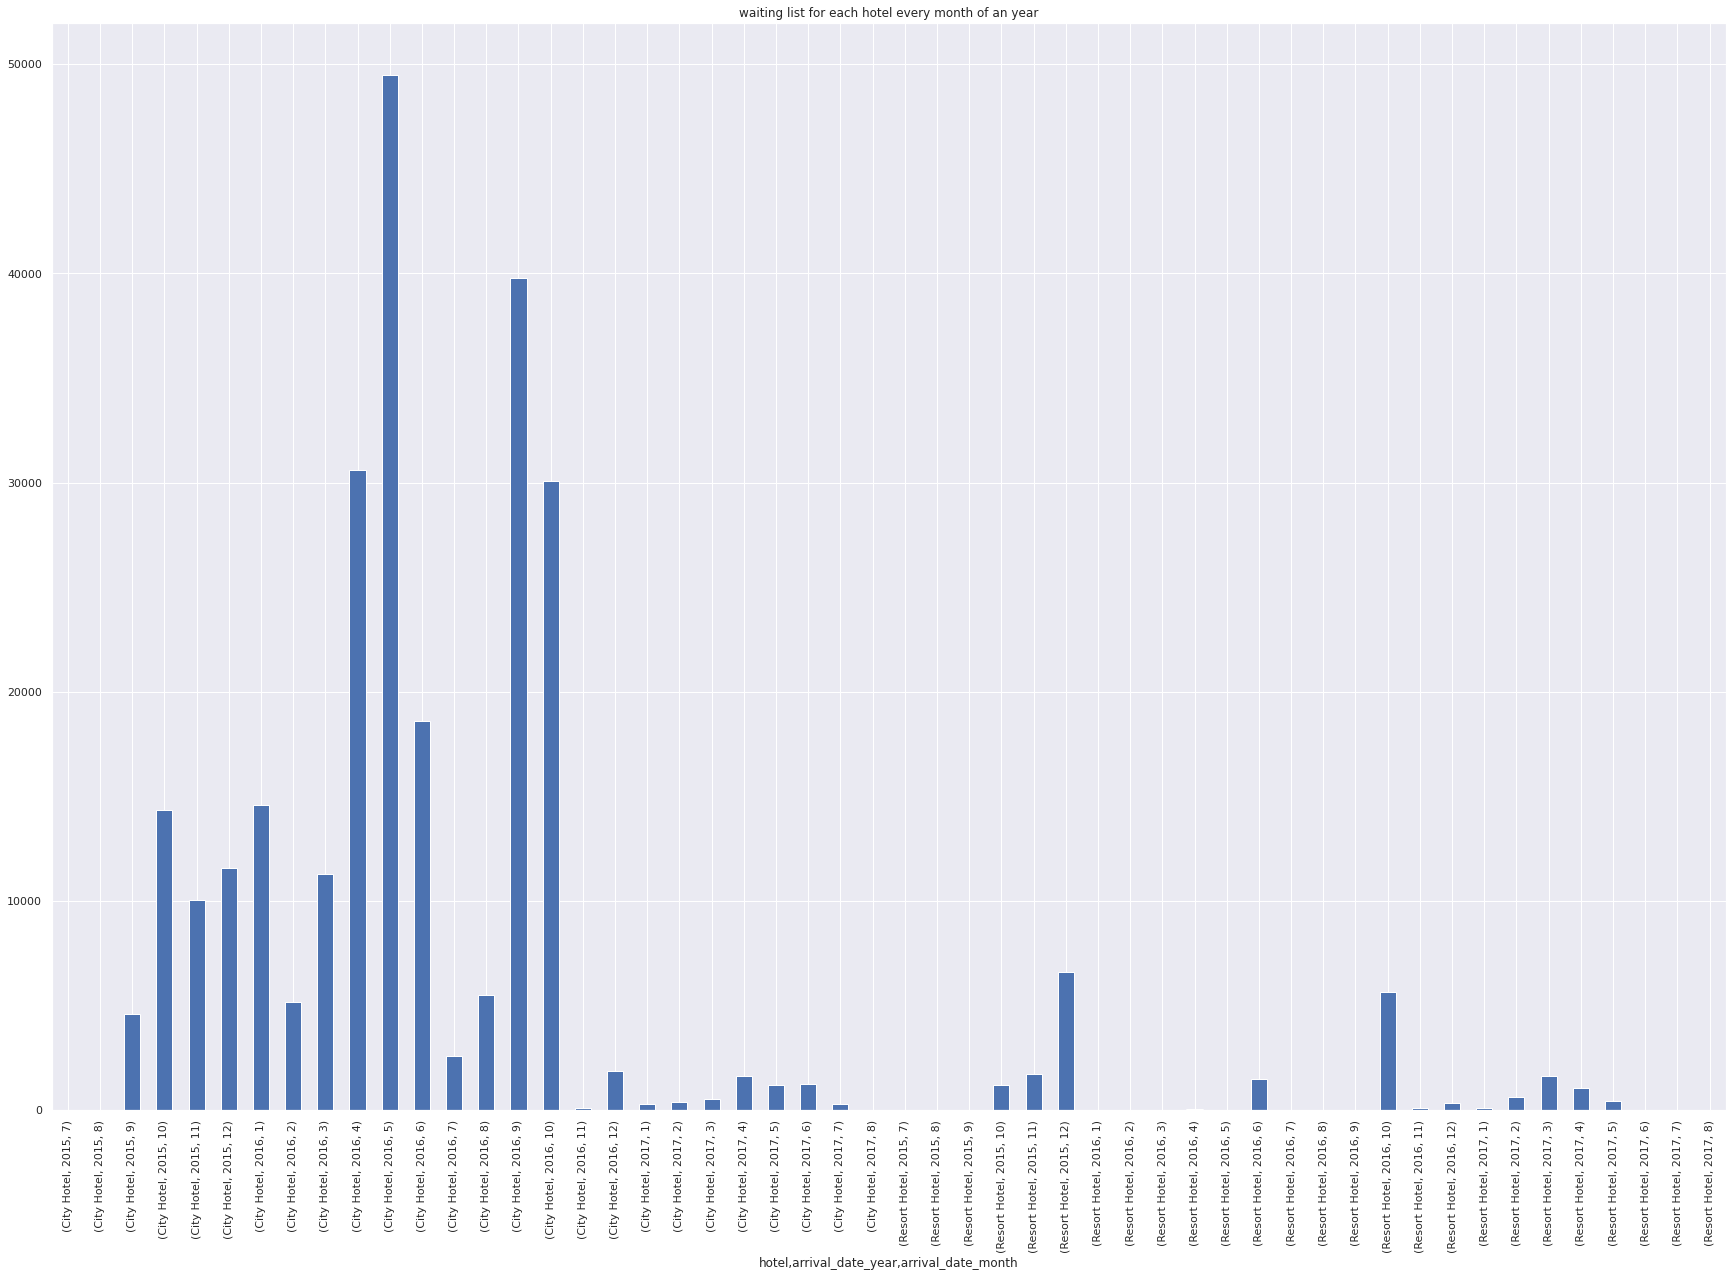

In [41]:
plt.figure(figsize=(30,20))
df.groupby(['hotel','arrival_date_year','arrival_date_month'])['days_in_waiting_list'].sum().plot(kind = "bar")
plt.title('waiting list for each hotel every month of an year')

The waiting list for hotel City is very high compared to waiting list for hotel Resort

Text(0.5, 1.0, 'cancelation list for each hotel every month of an year')

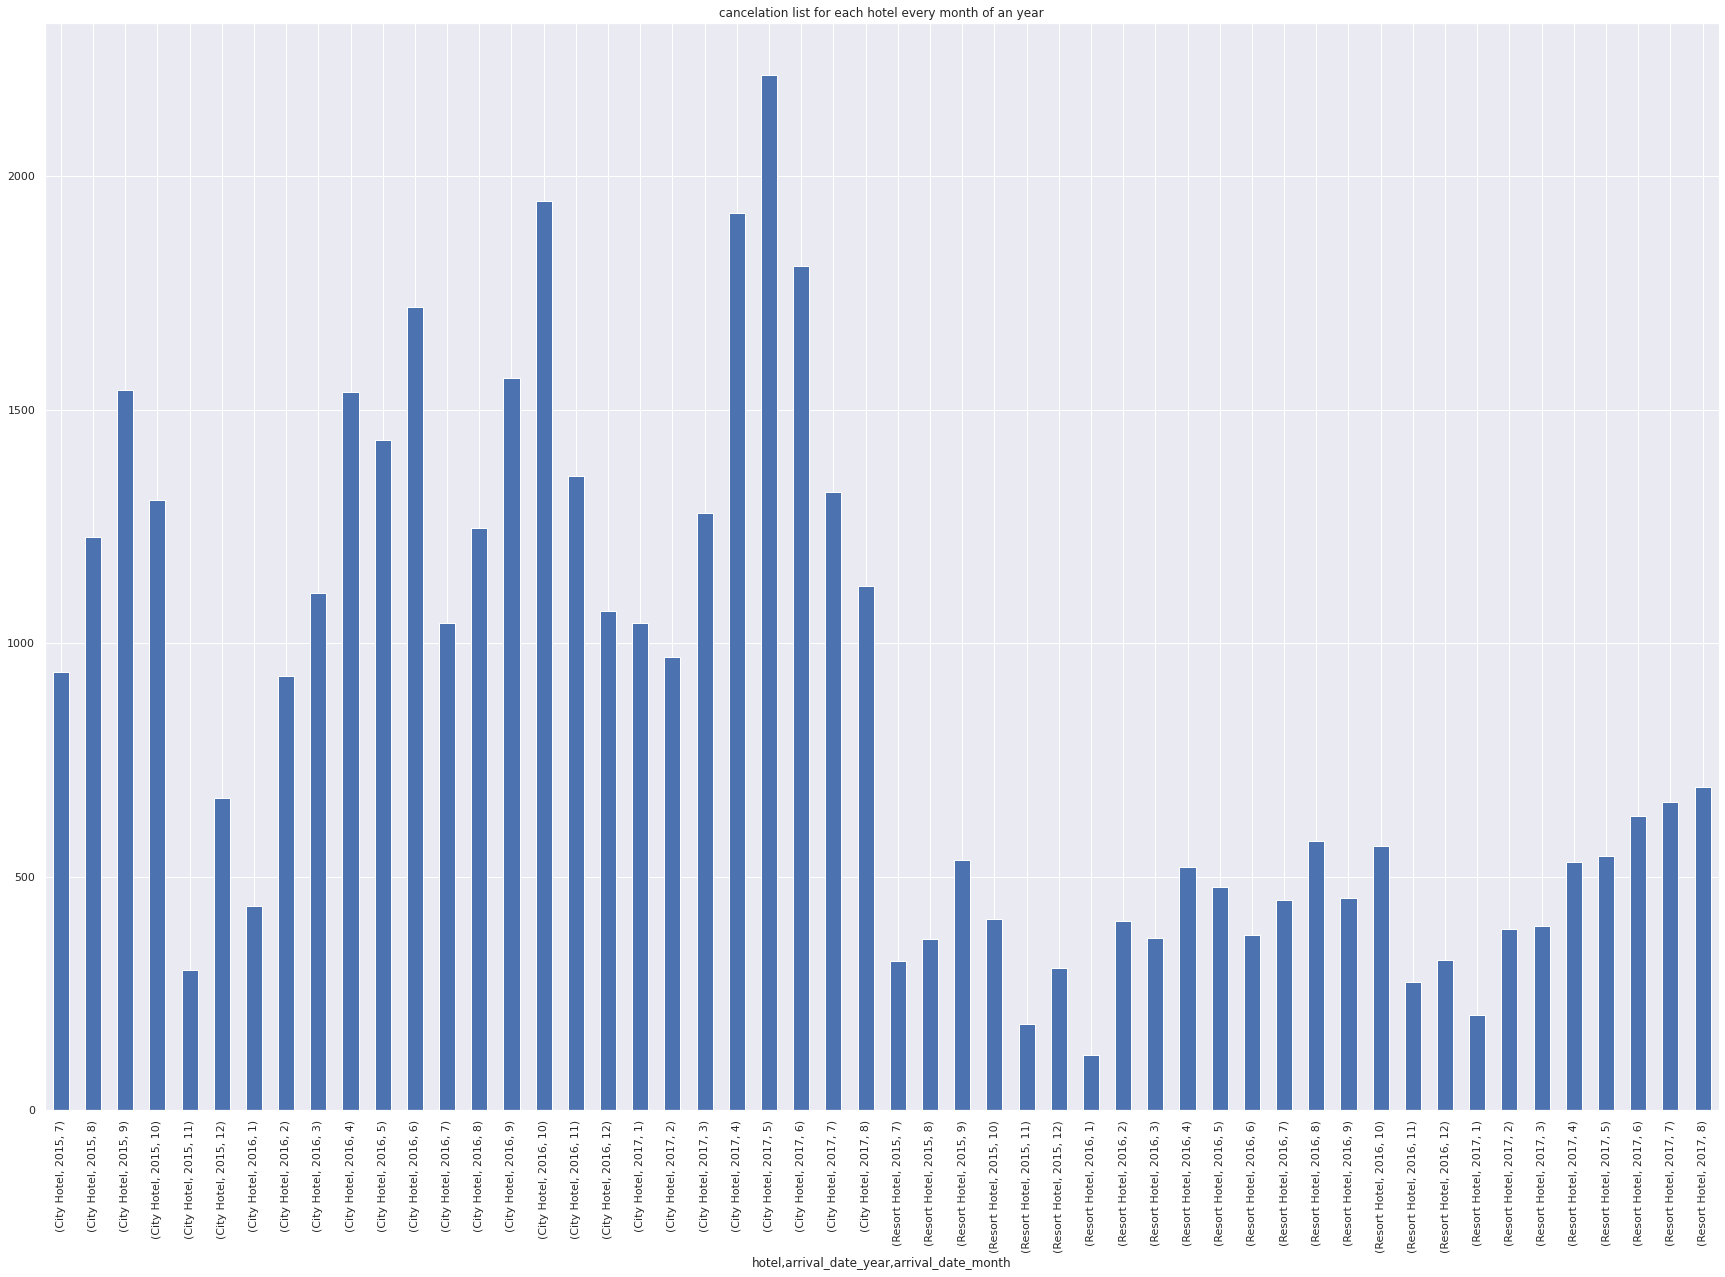

In [42]:
plt.figure(figsize=(30,20))
df.groupby(['hotel','arrival_date_year','arrival_date_month'])['is_canceled'].sum().plot(kind = "bar")
plt.title('cancelation list for each hotel every month of an year')

The cancel list for hotel City is very high compared to waiting list for hotel Resort

Text(0.5, 1.0, 'Total number of repeated guest in each month for every year')

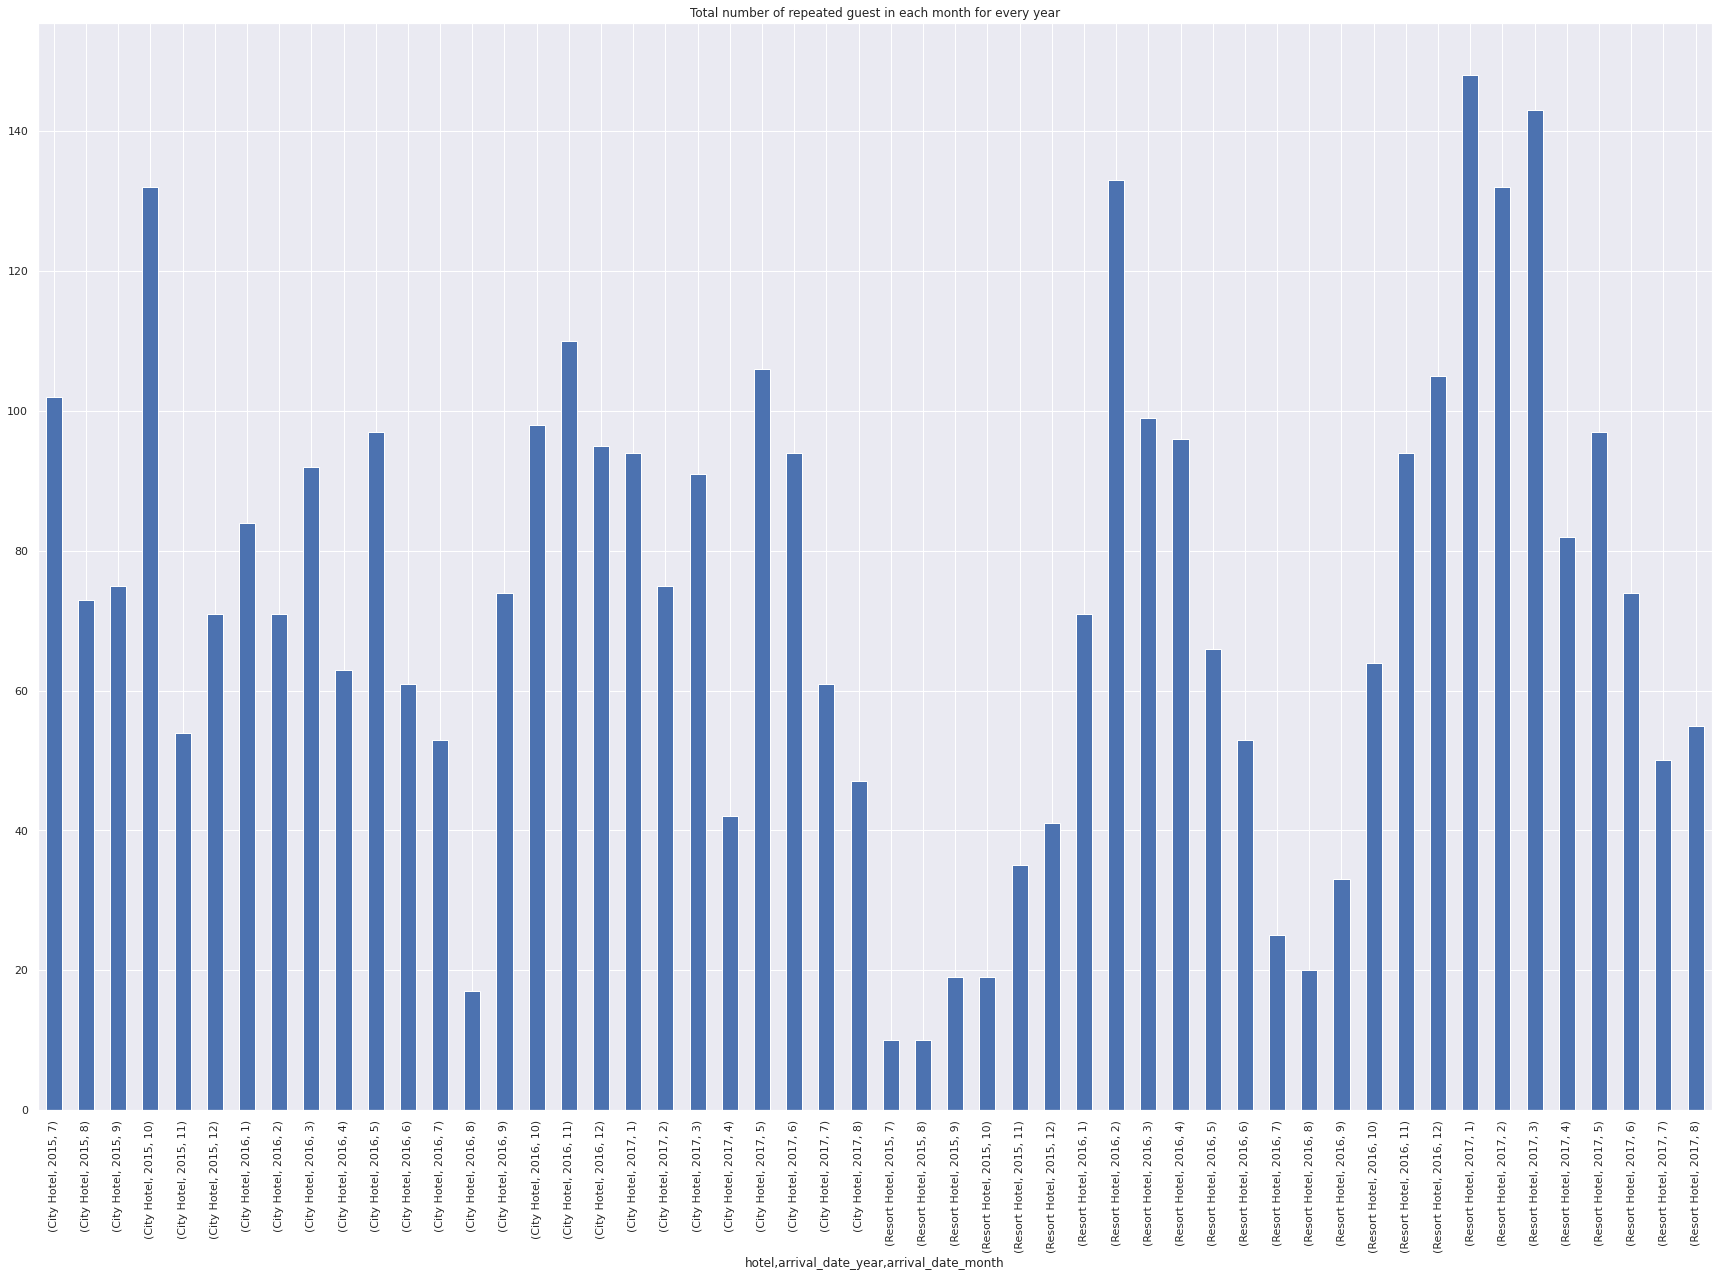

In [43]:
plt.figure(figsize=(30,20))
df.groupby(['hotel','arrival_date_year','arrival_date_month'])['is_repeated_guest'].sum().plot(kind = "bar")
plt.title('Total number of repeated guest in each month for every year')

In [44]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


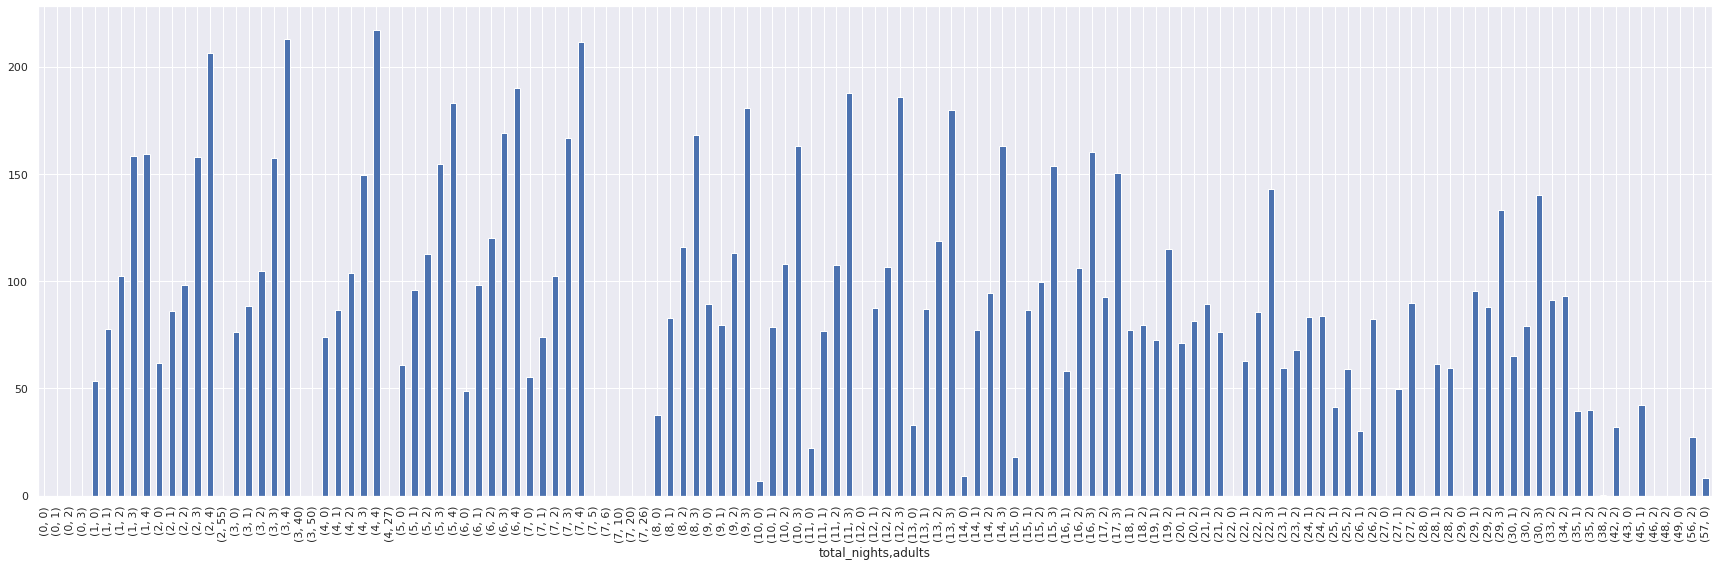

In [45]:
plt.figure(figsize=(30,9))
df.groupby(['total_nights','adults'])['adr'].mean().plot(kind='bar')

In [46]:

k=df.groupby(['total_nights','adults'])['adr'].mean()
k

total_nights  adults
0             0          0.000000
              1          0.000000
              2          0.000000
              3          0.000000
1             0         53.381522
                          ...    
46            2          0.000000
48            2          0.000000
49            0          0.000000
56            2         27.145000
57            0          8.340000
Name: adr, Length: 131, dtype: float64

In [47]:
k=k.reset_index()

In [48]:
k

,total_nights,adults,adr
0,0,0,0.000000
1,0,1,0.000000
2,0,2,0.000000
3,0,3,0.000000
4,1,0,53.381522
...,...,...,...
126,46,2,0.000000
127,48,2,0.000000
128,49,0,0.000000
129,56,2,27.145000


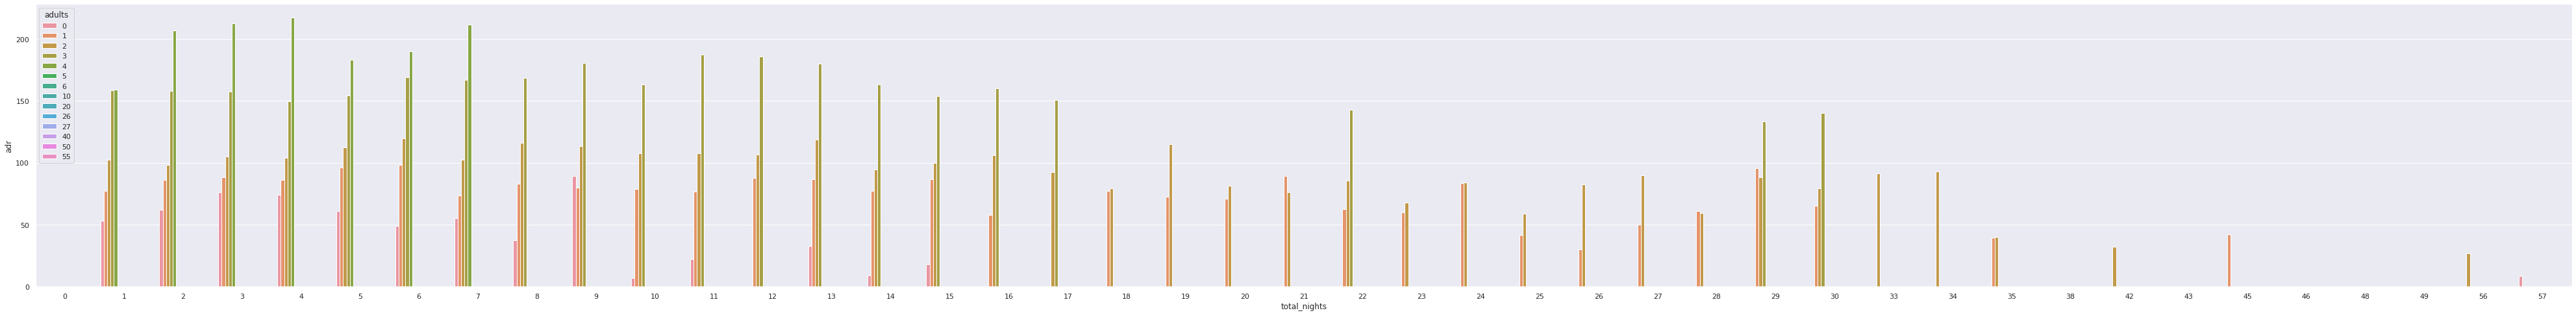

In [49]:
fig=plt.figure(figsize=(70,8))
ax=fig.gca()
sns.barplot(x='total_nights',y='adr',hue='adults',data=k,ax=ax)

Text(0.5, 1.0, 'adr for single adult')

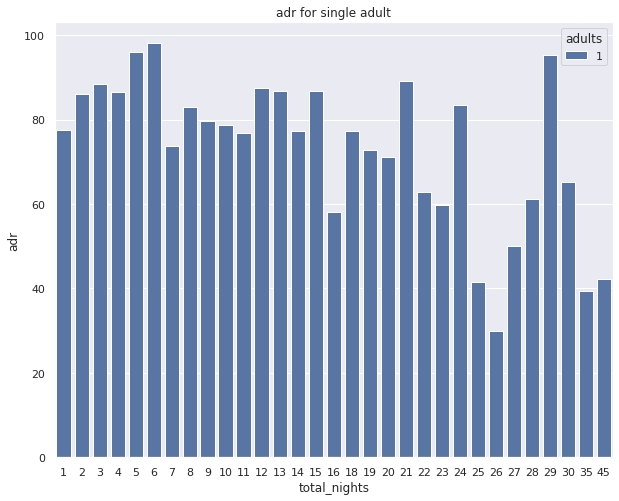

In [66]:
fig=plt.figure(figsize=(10,8))
ax=fig.gca()
sns.barplot(x='total_nights',y='adr',hue='adults',data=k[(k['adults']==1) & (k['total_nights']!=0)],ax=ax)
plt.title('adr for single adult')

In [50]:
k[(k['adults']==1) & (k['total_nights']!=0)]

,total_nights,adults,adr
5,1,1,77.488399
10,2,1,85.942367
16,3,1,88.449008
23,4,1,86.409678
29,5,1,95.994765
34,6,1,98.090306
39,7,1,73.792824
49,8,1,83.030698
53,9,1,79.732247
57,10,1,78.785676


In [52]:
k[(k['adults']==2) & (k['total_nights']!=0)]

,total_nights,adults,adr
6,1,2,102.348021
11,2,2,98.043393
17,3,2,104.844161
24,4,2,103.839025
30,5,2,112.459057
35,6,2,119.959997
40,7,2,102.507326
50,8,2,116.087511
54,9,2,113.323828
58,10,2,107.857532


Text(0.5, 1.0, 'adr for two adult')

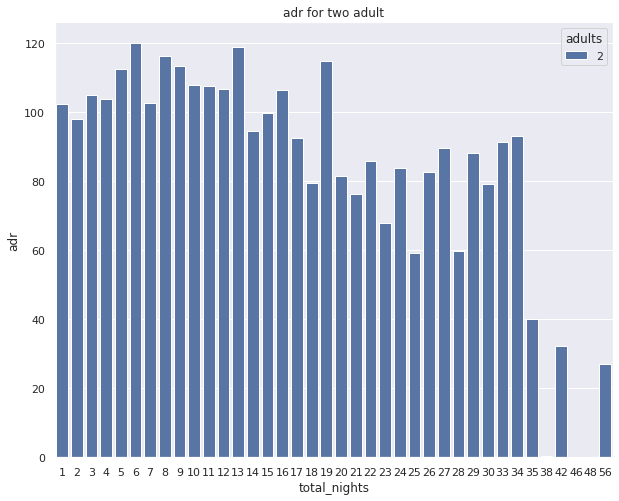

In [67]:
fig=plt.figure(figsize=(10,8))
ax=fig.gca()
sns.barplot(x='total_nights',y='adr',hue='adults',data=k[(k['adults']==2) & (k['total_nights']!=0)],ax=ax)
plt.title('adr for two adult')

In [54]:
k[(k['adults']==3) & (k['total_nights']!=0)]

,total_nights,adults,adr
7,1,3,158.463168
12,2,3,157.767279
18,3,3,157.440330
25,4,3,149.550258
31,5,3,154.404354
36,6,3,168.959520
41,7,3,166.958630
51,8,3,168.358289
55,9,3,180.691311
59,10,3,163.188971


Text(0.5, 1.0, 'adr for three adult')

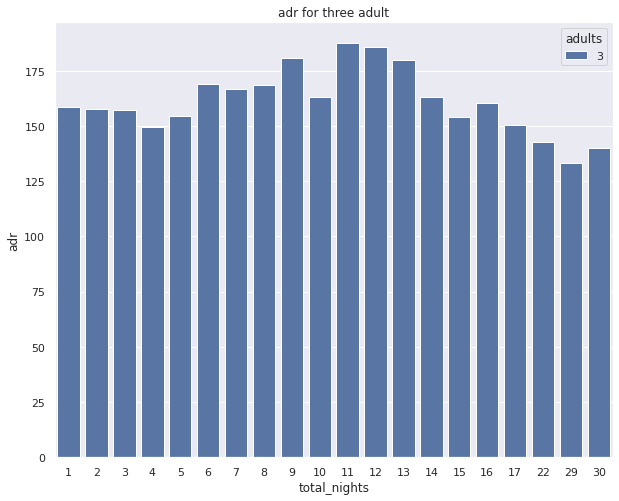

In [68]:
fig=plt.figure(figsize=(10,8))
ax=fig.gca()
sns.barplot(x='total_nights',y='adr',hue='adults',data=k[(k['adults']==3) & (k['total_nights']!=0)],ax=ax)
plt.title('adr for three adult')

In [56]:
k[(k['adults']==4) & (k['total_nights']!=0)]

,total_nights,adults,adr
8,1,4,159.167692
13,2,4,206.575385
19,3,4,212.698333
26,4,4,217.201250
32,5,4,183.206000
37,6,4,190.000000
42,7,4,211.515000


Text(0.5, 1.0, 'adr for single adult')

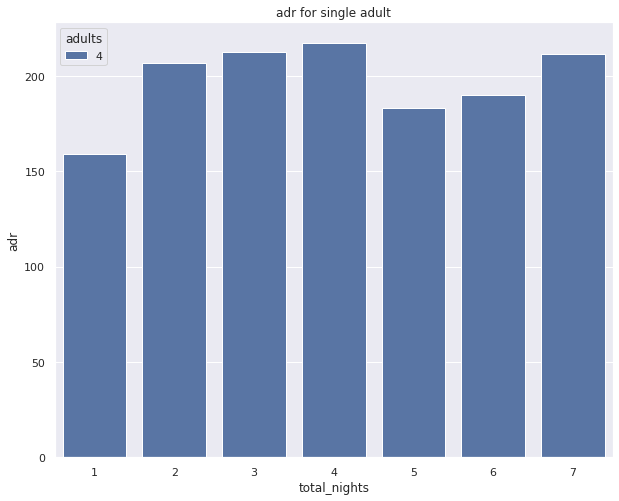

In [69]:
fig=plt.figure(figsize=(10,8))
ax=fig.gca()
sns.barplot(x='total_nights',y='adr',hue='adults',data=k[(k['adults']==4) & (k['total_nights']!=0)],ax=ax)
plt.title('adr for single adult')


In [58]:
length=df.groupby(['hotel','total_nights','adults'])['adr'].mean()

In [59]:
length=length.reset_index()
length

,hotel,total_nights,adults,adr
0,City Hotel,0,0,0.000000
1,City Hotel,0,1,0.000000
2,City Hotel,0,2,0.000000
3,City Hotel,0,3,0.000000
4,City Hotel,1,0,54.567778
...,...,...,...,...
210,Resort Hotel,38,2,0.260000
211,Resort Hotel,42,2,32.167500
212,Resort Hotel,45,1,42.110000
213,Resort Hotel,46,2,0.000000


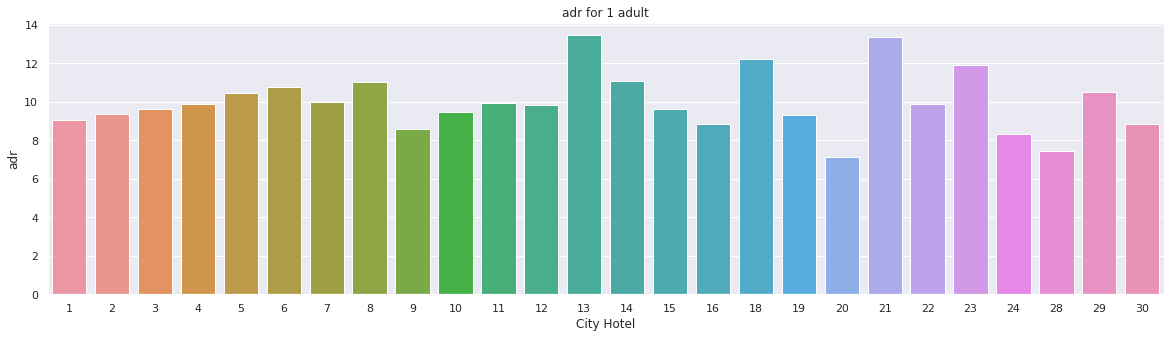

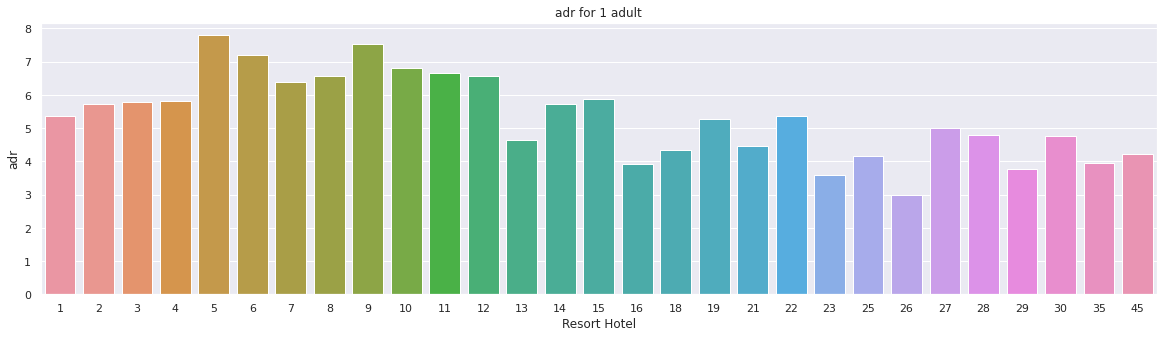

In [79]:
plt.rcParams["figure.figsize"] = (20,5)
sns.barplot(x='total_nights',y='adr',data=length[(length['adults']==1) & (length['total_nights']!=0) & (length['hotel']=='City Hotel')])
plt.title('adr for 1 adult')
plt.xlabel('City Hotel')
plt.show()
sns.barplot(x='total_nights',y='adr',data=length[(length['adults']==1) & (length['total_nights']!=0) & (length['hotel']=='Resort Hotel')])
plt.title('adr for 1 adult')
plt.xlabel('Resort Hotel')
plt.show()

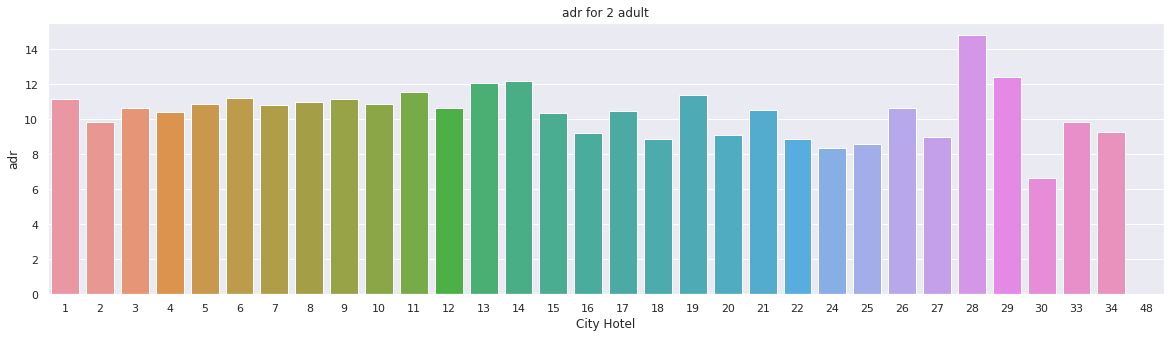

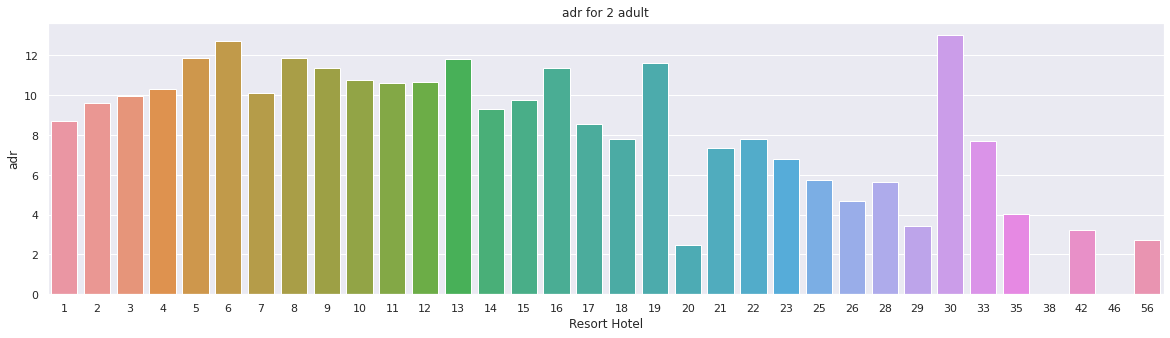

In [80]:
plt.rcParams["figure.figsize"] = (20,5)
sns.barplot(x='total_nights',y='adr',data=length[(length['adults']==2) & (length['total_nights']!=0) & (length['hotel']=='City Hotel')])
plt.title('adr for 2 adult')
plt.xlabel('City Hotel')
plt.show()
sns.barplot(x='total_nights',y='adr',data=length[(length['adults']==2) & (length['total_nights']!=0) & (length['hotel']=='Resort Hotel')])
plt.title('adr for 2 adult')
plt.xlabel('Resort Hotel')
plt.show()

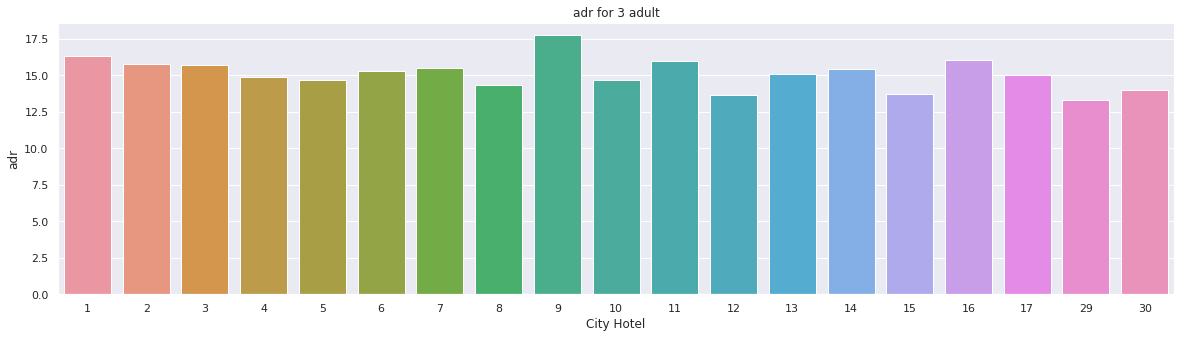

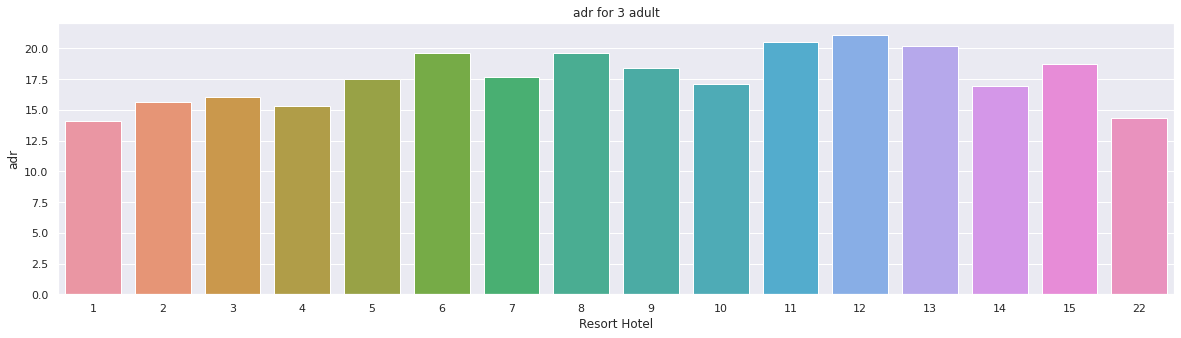

In [81]:
plt.rcParams["figure.figsize"] = (20,5)
sns.barplot(x='total_nights',y='adr',data=length[(length['adults']==3) & (length['total_nights']!=0) & (length['hotel']=='City Hotel')])
plt.title('adr for 3 adult')
plt.xlabel('City Hotel')
plt.show()
sns.barplot(x='total_nights',y='adr',data=length[(length['adults']==3) & (length['total_nights']!=0) & (length['hotel']=='Resort Hotel')])
plt.title('adr for 3 adult')
plt.xlabel('Resort Hotel')
plt.show()

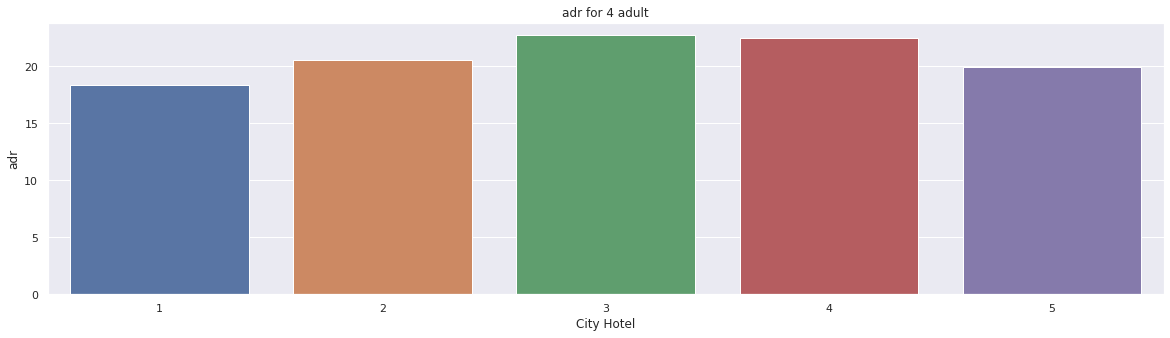

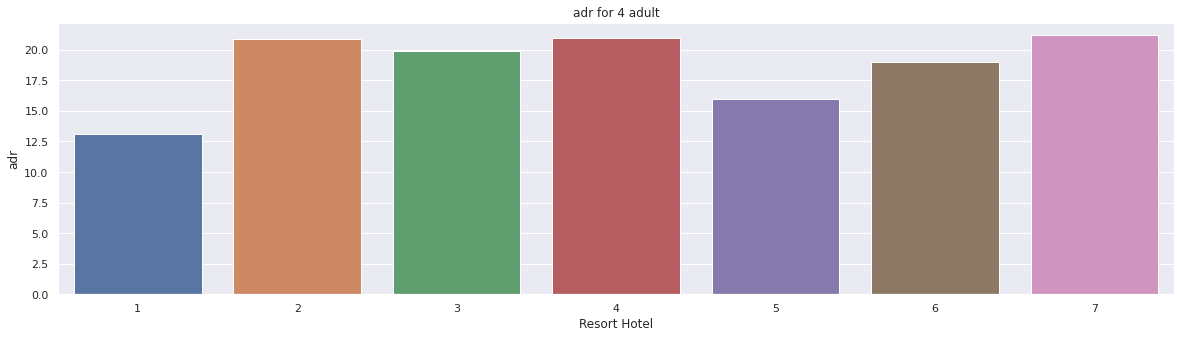

In [82]:
plt.rcParams["figure.figsize"] = (20,5)
sns.barplot(x='total_nights',y='adr',data=length[(length['adults']==4) & (length['total_nights']!=0) & (length['hotel']=='City Hotel')])
plt.title('adr for 4 adult')
plt.xlabel('City Hotel')
plt.show()
sns.barplot(x='total_nights',y='adr',data=length[(length['adults']==4) & (length['total_nights']!=0) & (length['hotel']=='Resort Hotel')])
plt.title('adr for 4 adult')
plt.xlabel('Resort Hotel')
plt.show()